# Exploratory Data Analysis (EDA) of Air Pollution in Skopje, Macedonia
Completed 1/19/2020  
Data provided by Bojan

## Project Overview:
Here we have air pollution data for the city Bojan currently lives in - Skopje, Macedonia.
The measurements go back ~10 years and include  6 measuring stations (A, B, C, D, E, G). The measurements are taken every hour but there is a lot of missing data and some station are active just since the last few years.
Higher ratings mean worse air quality.
Anything over 50 is considered not good. Anything over 200 is considered hazardous.

Let's try to answer the following questions for the last 5 winters, a winter being the period from November including February. We are looking at the years 2013/14 until 2017/18.
1. Which have been the top 3 worst months overall?
2. Which measuring station has the highest ratings on average?
3. Make a pie chart with the average rating for each station
4. Which is the worst month per measuring station on average? Is it the same for them all?
5. Make a horizontal bar chart showing how many days in total the measurements have been over 50 for each. 
6. Same chart for over 200.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
# Data viz style
import seaborn as sns
plt.style.use('seaborn-deep')
%matplotlib inline

## 1. Data Cleaning:

### Import the data

In [3]:
data = pd.read_csv("pm10_data.csv", parse_dates=True)

### Examine the data

In [4]:
data.head()

,A,B,C,D,E,G,time
0,NaN,NaN,NaN,NaN,NaN,120.26,2008-01-01 00:00:00
1,NaN,NaN,124.84,99.12,NaN,130.95,2008-01-01 01:00:00
2,NaN,NaN,107.64,98.37,NaN,130.19,2008-01-01 02:00:00
3,NaN,NaN,107.80,89.33,NaN,121.46,2008-01-01 03:00:00
4,NaN,NaN,100.65,94.35,NaN,103.99,2008-01-01 04:00:00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92246 entries, 0 to 92245
Data columns (total 7 columns):
A       55670 non-null float64
B       50826 non-null float64
C       64273 non-null float64
D       82896 non-null float64
E       65715 non-null float64
G       76992 non-null float64
time    92246 non-null object
dtypes: float64(6), object(1)
memory usage: 4.9+ MB


#### Convert date to datetime format and make it the index

In [6]:
# Rename column from time to date
data=data.rename(columns = {'time':'date'})

In [7]:
data.date.dtype

dtype('O')

In [8]:
# convert it to datetime format
data['date'] = pd.to_datetime(data['date'])

In [9]:
data.date.dtype

dtype('<M8[ns]')

In [10]:
# make the date the index
data.set_index('date', inplace=True)

In [11]:
data.head()

,A,B,C,D,E,G
date,,,,,,
2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,120.26
2008-01-01 01:00:00,NaN,NaN,124.84,99.12,NaN,130.95
2008-01-01 02:00:00,NaN,NaN,107.64,98.37,NaN,130.19
2008-01-01 03:00:00,NaN,NaN,107.80,89.33,NaN,121.46
2008-01-01 04:00:00,NaN,NaN,100.65,94.35,NaN,103.99


#### Create a new column that gets the combined average for all 6 stations

In [12]:
data['Combined'] = data.mean(axis=1)
data.head()

,A,B,C,D,E,G,Combined
date,,,,,,,
2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,120.26,120.260000
2008-01-01 01:00:00,NaN,NaN,124.84,99.12,NaN,130.95,118.303333
2008-01-01 02:00:00,NaN,NaN,107.64,98.37,NaN,130.19,112.066667
2008-01-01 03:00:00,NaN,NaN,107.80,89.33,NaN,121.46,106.196667
2008-01-01 04:00:00,NaN,NaN,100.65,94.35,NaN,103.99,99.663333


#### Get rid of any rows with no data at all (combined = NaN)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92246 entries, 2008-01-01 00:00:00 to 2018-03-09 23:00:00
Data columns (total 7 columns):
A           55670 non-null float64
B           50826 non-null float64
C           64273 non-null float64
D           82896 non-null float64
E           65715 non-null float64
G           76992 non-null float64
Combined    91739 non-null float64
dtypes: float64(7)
memory usage: 5.6 MB


In [14]:
# count of null rows in Combined
data['Combined'].isna().sum()

507

In [15]:
# percent of total
data['Combined'].isna().sum() / len(data.index) * 100

0.5496173275805997

In [16]:
# drop em
data = data.dropna(subset=['Combined'])

In [17]:
# count of null rows
data['Combined'].isna().sum()

0

## 2. Exploratory Data Analysis

#### Ex 1. Which have been the top 3 worst months overall?

In [18]:
# Aggregate by month
data_monthly = data.resample('M').mean()
data_monthly.head()

,A,B,C,D,E,G,Combined
date,,,,,,,
2008-01-31,NaN,NaN,128.427210,183.496871,NaN,165.894295,159.292806
2008-02-29,NaN,NaN,103.447677,152.298737,NaN,126.949795,127.948333
2008-03-31,77.520488,NaN,61.652862,79.710671,NaN,82.297210,77.021969
2008-04-30,76.780893,NaN,55.808413,65.226590,NaN,73.776319,67.403371
2008-05-31,NaN,NaN,52.928713,65.947887,NaN,61.131588,58.965734


In [19]:
# Isolate the winter months (Nov up to and including Feb aka Month>=11 or Month<=2)
data_winter = data_monthly[(data_monthly.index.month>=11) | (data_monthly.index.month<=2)]
data_winter.head()

,A,B,C,D,E,G,Combined
date,,,,,,,
2008-01-31,NaN,NaN,128.427210,183.496871,NaN,165.894295,159.292806
2008-02-29,NaN,NaN,103.447677,152.298737,NaN,126.949795,127.948333
2008-11-30,NaN,NaN,110.575986,146.269852,NaN,123.912886,119.940945
2008-12-31,NaN,NaN,NaN,76.933954,NaN,84.076260,83.971495
2009-01-31,NaN,31.469352,NaN,214.988354,107.690344,183.968351,167.881782


In [66]:
# These are the worst 3 months (looking at all monthly data)
data_monthly['Combined'].sort_values(ascending=False).head(3)

date
2013-12-31    235.008227
2011-11-30    211.661886
2012-12-31    209.454450
Name: Combined, dtype: float64

In [68]:
# These are the worst 3 months (looking at just winter months.  Same as monthly)
data_winter['Combined'].sort_values(ascending=False).head(3)

date
2013-12-31    235.008227
2011-11-30    211.661886
2012-12-31    209.454450
Name: Combined, dtype: float64

Answer:   
1. Dec 2013
2. Nov 2011
3. Dec 2012

#### Ex 2. Which measuring station has the highest ratings on average?

In [26]:
# Average when using all data
data.mean().sort_values(ascending=False)

D           94.647895
B           80.485886
G           76.967020
Combined    76.412897
A           72.715512
C           67.513649
E           50.960180
dtype: float64

In [27]:
# Average when using monthly data
data_monthly.mean().sort_values(ascending=False)

D           95.469708
B           81.059289
G           77.834788
Combined    76.626735
A           71.465676
C           67.914770
E           51.792864
dtype: float64

In [28]:
# Average of winter months only
data_winter.mean().sort_values(ascending=False)

D           170.302129
G           127.195559
Combined    127.100217
B           126.961979
A           120.755954
C           113.991342
E            78.943114
dtype: float64

Answer:  
Station D

#### Ex 3. Make a pie chart with the average rating for each station

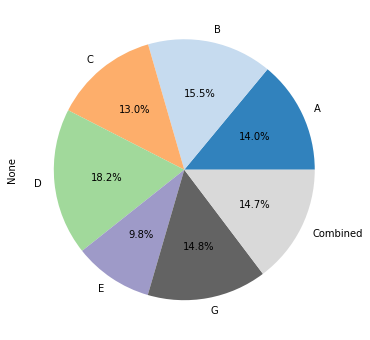

In [29]:
# Using all data
data.mean().plot.pie(y='columns', autopct='%1.1f%%', colormap='tab20c', figsize=(6,6))

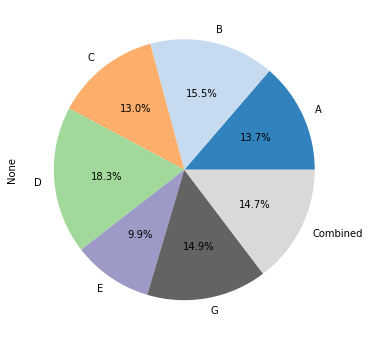

In [30]:
# Using monthly data
data_monthly.mean().plot.pie(y='columns', autopct='%1.1f%%', colormap='tab20c', figsize=(6,6))

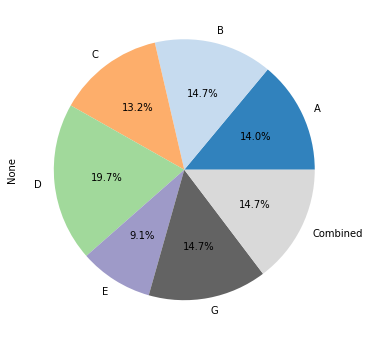

In [31]:
# Using winter month data
data_winter.mean().plot.pie(y='columns', autopct='%1.1f%%', colormap='tab20c', figsize=(6,6))

#### Ex 4. Which is the worst month per measuring station on average? Is it the same for them all?

In [52]:
print(f"The worst month for Station A was {data_monthly['A'].idxmax().strftime('%b %Y')} with a reading of {data_monthly['A'].max()}")

The worst month for Station A was Dec 2013 with a reading of 239.218054581152


In [54]:
print(f"The worst month for Station B was {data_monthly['B'].idxmax().strftime('%b %Y')} with a reading of {data_monthly['B'].max()}")

The worst month for Station B was Dec 2012 with a reading of 322.95581985294103


In [55]:
print(f"The worst month for Station C was {data_monthly['C'].idxmax().strftime('%b %Y')} with a reading of {data_monthly['C'].max()}")

The worst month for Station C was Dec 2013 with a reading of 224.38452135416682


In [56]:
print(f"The worst month for Station D was {data_monthly['D'].idxmax().strftime('%b %Y')} with a reading of {data_monthly['D'].max()}")

The worst month for Station D was Nov 2011 with a reading of 309.1601685483869


In [57]:
print(f"The worst month for Station E was {data_monthly['E'].idxmax().strftime('%b %Y')} with a reading of {data_monthly['E'].max()}")

The worst month for Station E was Jan 2017 with a reading of 158.0910202080238


In [58]:
print(f"The worst month for Station G was {data_monthly['G'].idxmax().strftime('%b %Y')} with a reading of {data_monthly['G'].max()}")

The worst month for Station G was Dec 2013 with a reading of 225.9015991428569


In [60]:
print(f"The worst month for the Combined station average was {data_monthly['Combined'].idxmax().strftime('%b %Y')} with a reading of {data_monthly['Combined'].max()}")

The worst month for the Combined station average was Dec 2013 with a reading of 235.00822653211796


Answer:  
A = Dec 2013  
B = Dec 2012  
C = Dec 2013  
D = Nov 2011  
E = Jan 2017  
G = Dec 2013  
Combined = Dec 2013

#### Ex 5. Make a horizontal bar chart showing how many days in total the measurements have been over 50 for each.

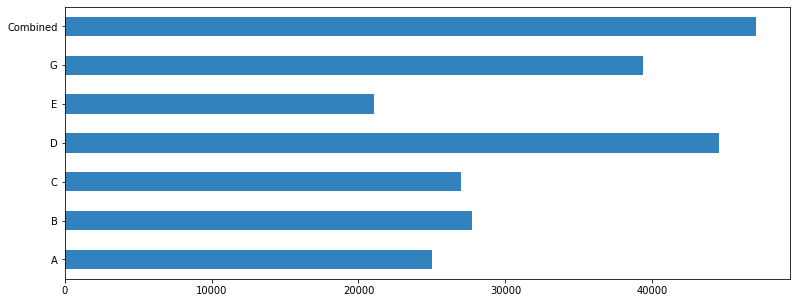

In [61]:
(data>=50).sum().plot.barh(colormap='tab20c', figsize=(13,5))

#### Ex 6. Same chart for over 200

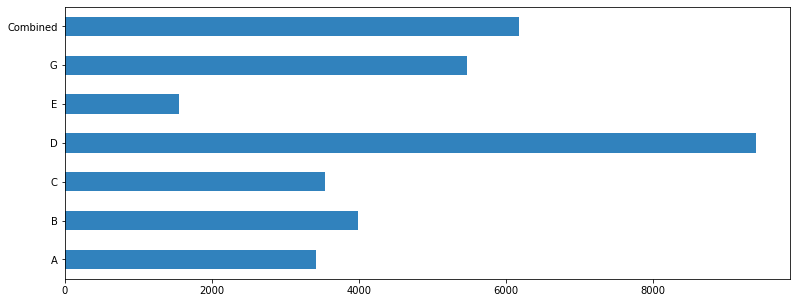

In [62]:
(data>200).sum().plot.barh(colormap='tab20c', figsize=(13,5))

### Bonus EDA for fun

#### Line chart of each station over time

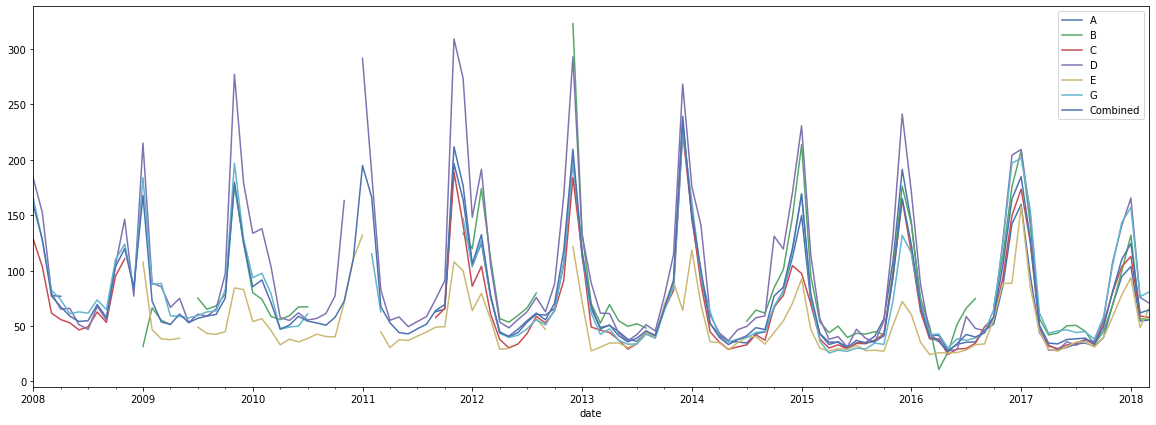

In [63]:
data_monthly = data_monthly.sort_index()
data_monthly.plot(figsize=(20,7))

#### Add rolling averages on the Combined series

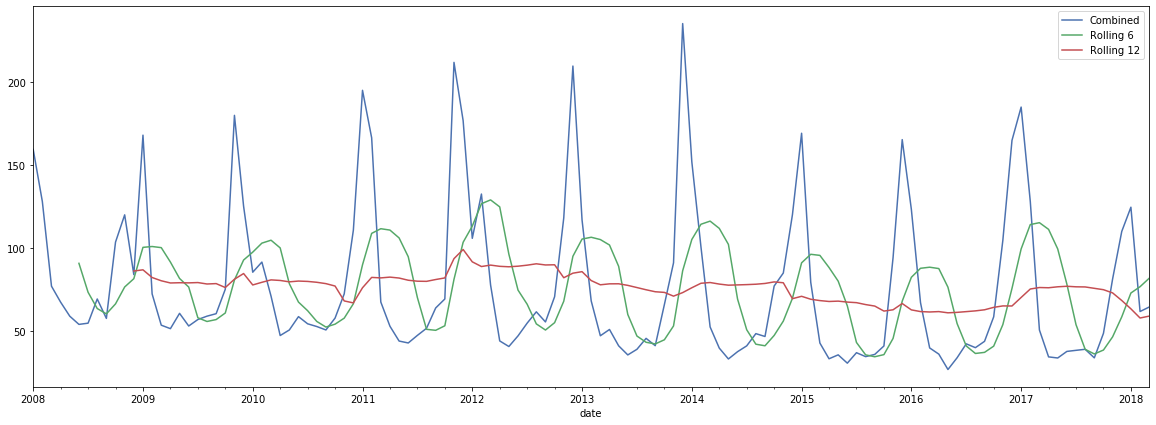

In [64]:
data_monthly['Rolling 6'] = data_monthly['Combined'].rolling(6).mean()
data_monthly['Rolling 12'] = data_monthly['Combined'].rolling(12).mean()
data_monthly[['Combined', 'Rolling 6', 'Rolling 12']].plot(figsize=(20,7))